In [2]:
import yfinance as yf
import pandas as pd                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pyarrow as pa

In [ ]:
# Obtener todos los símbolos de acciones del S&P 500
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_symbols = sp500['Symbol'].tolist()

# Definir el rango de fechas
start_date = '2000-01-01'
end_date = '2023-02-22'

# Crear un DataFrame vacío para almacenar los datos
sp500_data = pd.DataFrame()


# Iterar a través de cada símbolo de acción y agregar los datos
for symbol in sp500_symbols:
    print(f"Descargando datos para {symbol}...")
    data = yf.download(symbol, start=start_date, end=end_date)
    if len(data) > 0:
        data['Symbol'] = symbol
        sp500_data = sp500_data.append(data)

In [7]:
sp500

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525522,2173400,MMM
1,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511250,2713800,MMM
2,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221245,3699400,MMM
3,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249767,5975800,MMM
4,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790697,4101200,MMM
...,...,...,...,...,...,...,...,...
2605015,2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,ZTS
2605016,2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,ZTS
2605017,2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,ZTS
2605018,2023-02-17,172.149994,173.289993,170.259995,172.029999,172.029999,1954500,ZTS


In [22]:
sp500["Date"] = pd.to_datetime(sp500["Date"])

In [ ]:
symbols = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISH', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FITB', 'FRC', 'FSLR', 'FE', 'FIS', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PKI', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SBNY', 'SPG', 'SWKS', 'SJM', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC', 'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']


In [5]:
sp500 = sp500_data.reset_index()
def get_candle_type(price):
  if price["Close"] > price["Open"] : return "bullish"
  if price["Close"] < price["Open"] : return "bearish"
  #if price["Close"] == price["Open"] : return "undefined"
  return "undefined"

def set_candle_type(row):
  type_ = row["Type"]
  if type_ is "bullish":
    return row["Delta"]
  if type_ is "bearish":
    return -row["Delta"]

  return None


<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\luis-\AppData\Local\Temp\ipykernel_9356\2086280308.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if type_ is "bullish":
C:\Users\luis-\AppData\Local\Temp\ipykernel_9356\2086280308.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if type_ is "bearish":


In [7]:

sp500['Symbol'] = sp500['Symbol']
sp500["Delta"] = sp500["High"] - sp500["Low"]
sp500["Type"]  = sp500.apply(lambda row: get_candle_type(row), axis=1)
sp500["Delta"] = sp500.apply(lambda row: set_candle_type(row), axis=1)
sp500.dropna(axis=1)
sp500

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,cambio,Type,Delta
0,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525513,2173400,MMM,1.218750,bearish,-1.218750
1,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511267,2713800,MMM,2.093750,bearish,-2.093750
2,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221237,3699400,MMM,2.562500,bullish,2.562500
3,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249754,5975800,MMM,4.093750,bullish,4.093750
4,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790703,4101200,MMM,1.937500,bullish,1.937500
...,...,...,...,...,...,...,...,...,...,...,...
2605015,2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,ZTS,7.720001,bearish,-7.720001
2605016,2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,ZTS,4.520004,bullish,4.520004
2605017,2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,ZTS,3.979996,bullish,3.979996
2605018,2023-02-17,172.149994,173.289993,170.259995,172.029999,172.029999,1954500,ZTS,3.029999,bearish,-3.029999


In [ ]:
sp500_data.shape

(2605020, 8)

In [10]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"


In [11]:
# Usar la función read_html() para leer la tabla desde la página web
tables = pd.read_html(url)

In [12]:
# La tabla que nos interesa es la primera
sp500_table = tables[0]

In [13]:
# Imprimir los primeros cinco registros del DataFrame
sp500_table.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [16]:
sp500_table.drop(["Security", "CIK",], axis=1, inplace=True)

In [17]:
# Fusionar los dataframes en función de la columna CustomerID
merged_df = pd.merge(sp500, sp500_table, on='Symbol')



In [40]:
# agregar una columna de crecimiento mensual para cada empresa
merged_df["Crecimiento"] = merged_df.groupby("Symbol")["Close"].pct_change()


In [18]:
# agregar una columna de promedio de crecimiento mensual para cada empresa y sector
merged_df["PromedioCrecimiento"] = merged_df.groupby(["Symbol", "GICS Sector"])["Crecimiento"].transform("mean")


In [23]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,cambio,Type,Delta,Crecimiento,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Founded,PromedioCrecimiento
0,2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525513,2173400,MMM,1.21875,bearish,-1.21875,NaN,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259
1,2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM,2.09375,bearish,-2.09375,-0.039735,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259
2,2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221237,3699400,MMM,2.56250,bullish,2.56250,0.028966,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259
3,2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM,4.09375,bullish,4.09375,0.080429,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259
4,2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790703,4101200,MMM,1.93750,bullish,1.93750,0.019851,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259


In [24]:
# agregar una columna de índice de tiempo en formato numérico para cada empresa
merged_df["Tiempo"] = pd.to_numeric(merged_df["Date"].dt.strftime("%Y%m"))


In [27]:

# función para calcular la pendiente de la regresión lineal
def calcular_tendencia(datos):
    # extraer los valores de tiempo y precios
    x = datos["Tiempo"].values
    y = datos["Close"].values
    # calcular la regresión lineal y retornar la pendiente
    return linregress(x, y).slope

# calcular la tendencia para cada empresa y sector
tendencias = merged_df.groupby(["Symbol", "GICS Sector"]).apply(calcular_tendencia)


In [28]:
# convertir las tendencias a un DataFrame
tendencias_df = tendencias.reset_index().rename(columns={0: "Tendencia"})

# unir la tabla original con la columna de tendencias
df = pd.merge(merged_df, tendencias_df, on=["Symbol", "GICS Sector"])


In [41]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,cambio,Type,Delta,Crecimiento,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Founded,PromedioCrecimiento,Tiempo,Tendencia
0,2000-01-03,48.031250,48.250000,47.031250,47.187500,25.525513,2173400,MMM,1.218750,bearish,-1.218750,NaN,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.066600
1,2000-01-04,46.437500,47.406250,45.312500,45.312500,24.511267,2713800,MMM,2.093750,bearish,-2.093750,-0.039735,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.066600
2,2000-01-05,45.562500,48.125000,45.562500,46.625000,25.221237,3699400,MMM,2.562500,bullish,2.562500,0.028966,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.066600
3,2000-01-06,47.156250,51.250000,47.156250,50.375000,27.249754,5975800,MMM,4.093750,bullish,4.093750,0.080429,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.066600
4,2000-01-07,50.562500,51.906250,49.968750,51.375000,27.790703,4101200,MMM,1.937500,bullish,1.937500,0.019851,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.066600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605015,2023-02-14,173.440002,176.660004,168.940002,171.899994,171.899994,3532400,ZTS,7.720001,bearish,-7.720001,0.053696,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1952,0.000802,202302,0.183084
2605016,2023-02-15,171.899994,175.270004,170.750000,175.020004,175.020004,2510800,ZTS,4.520004,bullish,4.520004,0.018150,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1952,0.000802,202302,0.183084
2605017,2023-02-16,173.630005,176.479996,172.500000,173.929993,173.929993,1951100,ZTS,3.979996,bullish,3.979996,-0.006228,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1952,0.000802,202302,0.183084
2605018,2023-02-17,172.149994,173.289993,170.259995,172.029999,172.029999,1954500,ZTS,3.029999,bearish,-3.029999,-0.010924,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1952,0.000802,202302,0.183084


In [15]:
df.to_csv('sp500.csv')

In [4]:
df= pd.read_parquet('sp500.parquet')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con las columnas "close" y "tendencia"

# Graficamos las líneas de tendencia juntas
df.groupby('Symbol').apply(lambda x: plt.plot(x.index, x['Close'], label=x['Symbol'].unique()[0]))
df.groupby('Symbol').apply(lambda x: plt.plot(x.index, x['Tendencia'], '--', label='Tendencia ' + x['Symbol'].unique()[0]))
plt.legend()
plt.show()


In [ ]:
# Supongamos que tienes un DataFrame llamado df con las columnas "close" y "tendencia"

# Agrupamos los datos por símbolo y creamos la regresión lineal para cada grupo
grupos = df.groupby('Symbol')
regs = grupos.apply(lambda x: LinearRegression().fit(x.index.values.reshape(-1, 1), x['Close']))

# Calculamos el error residual para cada grupo

errores = grupos.apply(lambda x: x['Close'] - regs.get(x['Symbol'].iloc[0], LinearRegression()).predict(x.index.values.reshape(-1, 1)))


# Graficamos los errores residuales
errores.plot(kind='bar', figsize=(10, 5))
plt.show()


In [ ]:

df_prices = df_tech.loc[df_tech['Date'] > '2000-01-01', ['Date', 'Close']]


# Agrupación de los datos por períodos de 3 años
df_prices = df_prices.set_index('Date').resample('2Y').last().reset_index()

# Gráfico de línea de los precios de cierre de las acciones
plt.figure(figsize=(12,8))  # Tamaño de la figura
plt.plot(df_prices['Date'], df_prices['Close'])
plt.title('Precios de cierre de las acciones de empresas de tecnología de la información (por períodos de 2 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

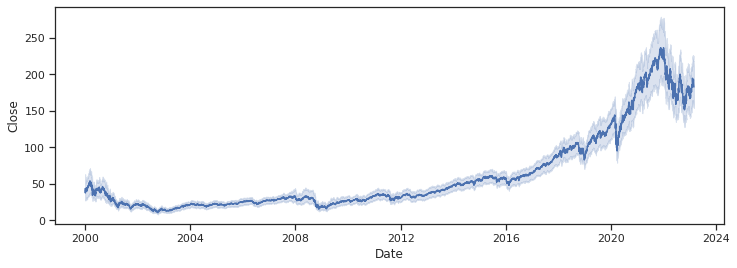

In [ ]:

plt.subplots(figsize=(12, 4))
sns.lineplot(data=df_tech, x=df_tech['Date'], y='Close')
plt.show()

# modelo de precicion 


empezamos 


In [ ]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
import Scikit-learn as

In [16]:


dataset = pd.read_csv('sp500.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

C:\Users\luis-\AppData\Local\Temp\ipykernel_9996\3358605092.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('sp500.csv', index_col='Date', parse_dates=['Date'])


,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Symbol,cambio,Type,Delta,Crecimiento,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Founded,PromedioCrecimiento,Tiempo,Tendencia
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,0,48.03125,48.25000,47.03125,47.1875,25.525513,2173400,MMM,1.21875,bearish,-1.21875,NaN,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.0666
2000-01-04,1,46.43750,47.40625,45.31250,45.3125,24.511267,2713800,MMM,2.09375,bearish,-2.09375,-0.039735,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.0666
2000-01-05,2,45.56250,48.12500,45.56250,46.6250,25.221237,3699400,MMM,2.56250,bullish,2.56250,0.028966,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.0666
2000-01-06,3,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM,4.09375,bullish,4.09375,0.080429,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.0666
2000-01-07,4,50.56250,51.90625,49.96875,51.3750,27.790703,4101200,MMM,1.93750,bullish,1.93750,0.019851,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902,0.000259,200001,0.0666


In [17]:
set_entrenamiento = dataset[:'2016'].iloc[:,1:2]
set_validacion = dataset['2017':].iloc[:,1:2]

C:\Users\luis-\AppData\Local\Temp\ipykernel_9996\831715719.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  set_validacion = dataset['2017':].iloc[:,1:2]


In [18]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

NameError: name 'MinMaxScaler' is not defined